# Regression Practice Problem: (25 points in total)

We are going to work on a regression problem in this notebook. <br>
The dataset we are using is the diabetes dataset from sklearn's toy dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>
Check out the url above if you would like to know about the meaning of each feature(/measurement). <br>
In this dataset, we have 420 samples, and each has 10 features. The goal is to predcit $y$, the quantitative measure of disease progression, using linear regression. <br>
The features are already normalized and ready for modeling purposes.


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import feature_selection

In [27]:
#load our dataset from sklearn
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [28]:
#take a look at our dataset X
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [29]:
# take a look at the ground truth/target for each patient
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

### Task 1: Exploring the features:

Execute the code below <br>
Answer the questions below and report it in your assignment PDF file. <br>
(1) What are the three features you will want to keep if you can only use three features to predict disease progression? <br>
Explain the reason in one sentence. (Hint: look at the output from pearson's r) <5 points> <br>
(2) Use the function, `PlotDataset`, to visualize the relationship between your chosen features and the disease progression (Include your plots in your assignment PDF). <5 points>

In [30]:
# Compute Pearson's r for each feature & the target

sklearn.feature_selection.r_regression(X, y)

array([ 0.18788875,  0.043062  ,  0.58645013,  0.44148176,  0.21202248,
        0.17405359, -0.39478925,  0.43045288,  0.56588259,  0.38248348])

In [31]:
#visualize the corelation between feature variables and disease progression
def PlotDataset(x, y, feature):
    '''
    x: the dataset feature matrix. (pd dataframe)
    y: the target vector (pd series)
    feature: the feature to visualize (type: str)

    '''
    plt.scatter(x.loc[:,[feature]], y,  color='black')
    plt.xlabel(feature)
    plt.ylabel('Diabetes Progression')

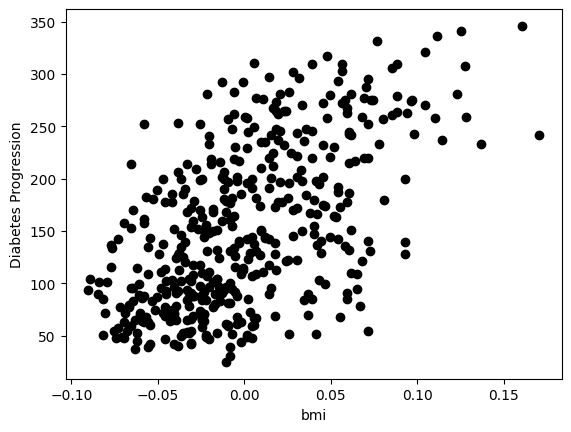

In [32]:

#TODO: change feature1 to the feature you selected
PlotDataset(X, y, "bmi")

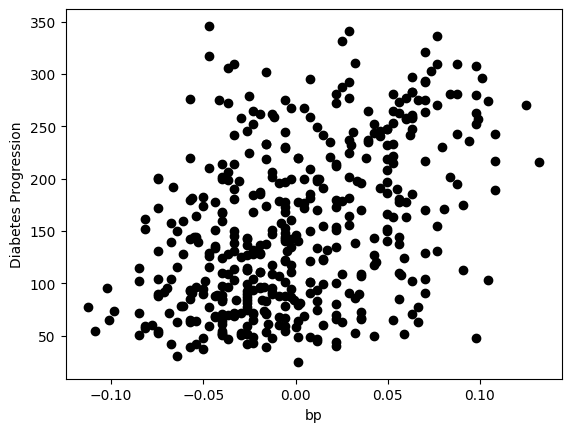

In [33]:
#TODO: change feature2 to the feature you selected
PlotDataset(X, y, "bp")

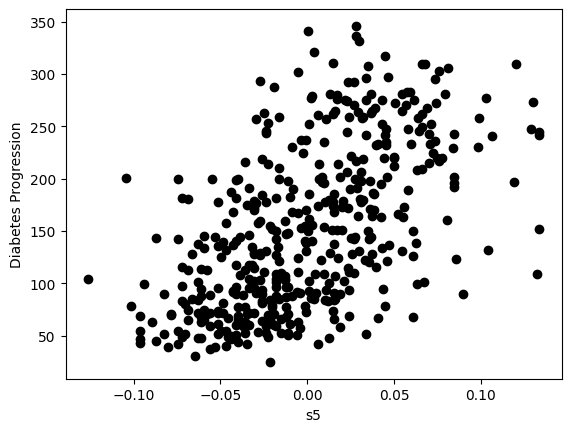

In [34]:
#TODO: change feature3 to the feature you selected
PlotDataset(X, y, "s5")


In [35]:
#define training and testing dataset
######## do not change anything in this cell ########

X_train = X.iloc[:300]
y_train = y.iloc[:300]
X_test = X.iloc[-100:]
y_test = y.iloc[-100:]


### Task 2: Gradient descent for linear regression:

Implement the gradient descent algorithm for linear regression. (Complete the code for gradient descent). <br>


Answer the questions below and report it in your assignment pdf file: <br>
(1) What is the MSE in your final iteration on your training set? What is the MSE on your test set? Note: Please use the formula $MSE = \frac{1}{2n} \sum_{i=1}^{n} (f_{\theta} (x^i) - y^i)^2$ <8 points ><br>

(2) Use the code below to plot the predictions and the actual diabetes progression, and include the figure in your assignment PDF. <7 points>


In [36]:
#Define the model: assume we already know the best set of coefficient theta, we can predict y using this fucntion.
def f(X, theta):
    return X.dot(theta)

#TODO: Define mean square error of the dataset given theta, X, y
#you can refer to the slides of Regression on page 25 in class
def mean_squared_error(theta, X, y):
    predictions = f(X, theta)
    errors = predictions - y
    mse = 1 / (2 * len(y)) * np.sum(errors ** 2)
    return mse

#TODO: Define the gradient of mean square error given theta, X, y
#you can refer to the slides on page 39 in class
def mse_gradient(theta, X, y):
    predictions = f(X, theta)
    errors = predictions - y
    gradient = 1 / len(y) * X.T.dot(errors)
    return gradient




In [37]:
#add the bias term for the dataset
X_train['one'] = 1
X_test['one'] = 1

<ipython-input-37-bd4c7403ef3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['one'] = 1
<ipython-input-37-bd4c7403ef3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['one'] = 1


In [38]:
iter = 0
theta, theta_prev = np.ones(11), np.full((11), 20)
alpha = 4e-1 #alpha is the step size for gradient descent
num_iters = 8000
threshold = 1e-2
################## DO NOT CHANGE THE CODE ABOVE THIS LINE IN THE CELL  ##############################


while iter < num_iters+1 and np.linalg.norm(theta - theta_prev) > threshold:
    gradient = mse_gradient(theta, X_train, y_train) #TODO: what is the gradient here? you can use the function you just implemented above
    theta_prev = theta
    theta = theta - alpha * gradient #TODO: what is the updated theta?
    if iter % 500 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
        print(f'the current theta is: {theta}') #you can delete to_numpy() if your theta is a numpy array already
    iter += 1


Iteration 0. MSE: 6944.291987
the current theta is: age     1.152277
sex     1.030928
bmi     1.722501
bp      1.535950
s1      1.172491
s2      1.150502
s3      0.549237
s4      1.448081
s5      1.660708
s6      1.423422
one    60.234027
dtype: float64
Iteration 500. MSE: 1763.481109
the current theta is: age     37.734793
sex    -38.233992
bmi    256.036919
bp     171.915442
s1      35.069063
s2       6.775013
s3    -143.770282
s4     133.393107
s5     238.400184
s6     136.273798
one    151.615938
dtype: float64
Iteration 1000. MSE: 1583.006863
the current theta is: age     24.506577
sex   -106.526195
bmi    366.535059
bp     229.364517
s1       6.959742
s2     -47.292416
s3    -177.841596
s4     142.222539
s5     332.623454
s6     158.571239
one    152.133219
dtype: float64
Iteration 1500. MSE: 1515.868146
the current theta is: age     10.233639
sex   -159.457768
bmi    430.488028
bp     256.191453
s1     -16.513698
s2     -89.860383
s3    -187.484377
s4     135.640614
s5     386.3

In [39]:
print("test set MSE:", mean_squared_error(theta, X_test, y_test))

test set MSE: 1386.871429506086


Text(0, 0.5, 'Actual Diabetes Progression- test set')

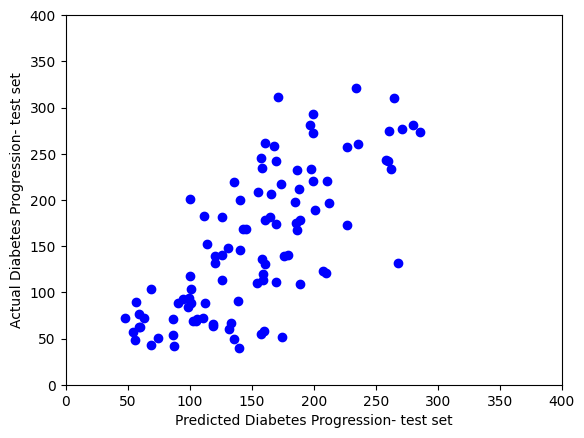

In [40]:
y_pred = f(X_test, theta)
plt.scatter(y_pred, y_test,  color='blue')
plt.xlim([0, 400])
plt.ylim([0, 400])
plt.xlabel('Predicted Diabetes Progression- test set')
plt.ylabel('Actual Diabetes Progression- test set')

### Submission: <br>

Please answer all the questions from above and write your responses in the assignment PDF (including the required plots). You will need to turn in your finished notebook along with the assignemnt PDF file. Please see hw1_torch_intro.ipynb for instructions on how to submit notebooks.